In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import datetime
import random

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


seed = 309
random.seed(seed)
np.random.seed(seed)

In [203]:
df = pd.read_csv("/Users/keirynhart/Documents/Uni/Comp 309/Assignment 4/data/Part 1 - regression/diamonds.csv")

In [204]:
df.head()
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


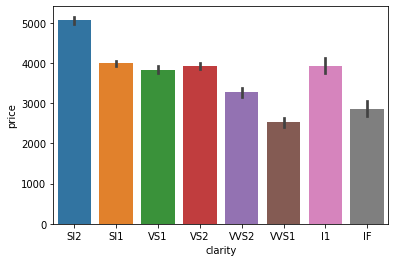

In [205]:

#sns.barplot(x = "cut", y = "price", data = df)
#sns.barplot(x = "color", y = "price", data = df)
sns.barplot(x = "clarity", y = "price", data = df)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   x           53940 non-null  float64
 8   y           53940 non-null  float64
 9   z           53940 non-null  float64
 10  price       53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [207]:
df['cut'] = df['cut'].apply(lambda x: 1 if x=='Fair' else(2 if x=='Good' 
                                           else(3 if x=='Very Good' 
                                           else(4 if x=='Premium' else 5))))

df['color'] = df['color'].apply(lambda x: 1 if x=='J' else(2 if x=='I'
                                          else(3 if x=='H'
                                          else(4 if x=='G'
                                          else(5 if x=='F'
                                          else(6 if x=='E' else 7))))))

df['clarity'] = df['clarity'].apply(lambda x: 1 if x=='I1' else(2 if x=='SI2'
                                          else(3 if x=='SI1'
                                          else(4 if x=='VS2'
                                          else(5 if x=='VS1'
                                          else(6 if x=='WS2'
                                          else 7 if x=='WS1' else 8))))))

In [208]:
df.isnull().values.any()

False

There are no missing values in the data

In [209]:
df['cut'].unique()

array([5, 4, 2, 3, 1])

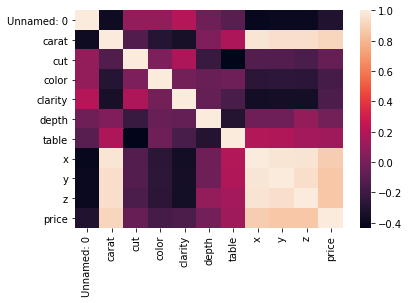

In [210]:
sns.heatmap(df.corr())

## Training and Testing split

In [211]:
train_data, test_data = train_test_split(df, test_size = 0.3, random_state = seed)

In [212]:
train_data.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,26932.728137,0.798166,3.903438,4.412045,4.302717,61.741557,57.458660,5.733020,5.737242,3.539638,3930.603130
std,15561.556646,0.472857,1.113829,1.700652,2.052403,1.426374,2.240281,1.120184,1.152877,0.708507,3973.019456
min,3.000000,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,0.000000,0.000000,0.000000,327.000000
25%,13448.250000,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,4.720000,4.720000,2.910000,953.000000
50%,26890.500000,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.530000,2409.000000
75%,40425.750000,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5330.000000
max,53940.000000,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [213]:
test_data.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000
mean,27058.634347,0.797413,3.905636,4.391237,4.315721,61.767717,57.453739,5.726811,5.728189,3.536623,3937.925102
std,15594.073336,0.476709,1.123071,1.702125,2.061084,1.446973,2.220987,1.125455,1.116677,0.699120,4027.612178
min,1.000000,0.200000,1.000000,1.000000,1.000000,50.800000,50.100000,0.000000,0.000000,0.000000,326.000000
25%,13626.750000,0.400000,3.000000,3.000000,3.000000,61.100000,56.000000,4.702500,4.720000,2.910000,947.000000
50%,27138.000000,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2394.000000
75%,40520.250000,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5314.750000
max,53939.000000,4.000000,5.000000,7.000000,8.000000,79.000000,73.000000,10.010000,9.940000,6.310000,18804.000000


In [214]:
train_labels = train_data['price']

In [215]:
train_labels.head()

36878      958
18820     7708
53406     2668
25954    15134
13825     5633
Name: price, dtype: int64

In [216]:
#copy
train_data_full = train_data.copy()

train_data = train_data.drop(['price'], axis = 1)

In [217]:
#drop price
train_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
36878,36879,0.42,5,6,4,61.7,56.0,4.80,4.82,2.97
18820,18821,1.03,5,4,8,61.7,56.0,6.45,6.56,4.00
53406,53407,0.82,5,6,2,62.1,55.0,6.04,6.01,3.74
25954,25955,1.40,5,4,8,60.8,57.0,7.21,7.23,4.39
13825,13826,1.00,3,6,4,63.5,56.0,6.37,6.32,4.03


In [218]:
#copy
test_data_full = test_data.copy()


#drop price
test_data = test_data.drop(['price'], axis = 1)

In [219]:
test_labels = test_data_full["price"]

In [220]:
test_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
48107,48108,0.50,5,4,8,60.5,55.0,5.15,5.13,3.11
38948,38949,0.31,2,2,5,63.8,56.0,4.27,4.32,2.74
9301,9302,1.00,2,6,3,63.9,57.0,6.31,6.34,4.04
9206,9207,1.26,1,2,2,64.8,57.0,6.73,6.69,4.35
53638,53639,0.30,5,7,3,61.0,57.0,4.29,4.33,2.63


In [221]:
#standardizing the data:

#train_mean = train_data.mean()
#train_std = train_data.std()
#train_data[] = (train_data - train_mean)/train_std
#test_data = (test_data - train_mean)/train_std



# Linear regression:

In [222]:
lr = LinearRegression()
lr.fit(train_data, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [223]:
y_pred = lr.predict(test_data)

In [224]:
coef = lr.coef_
intercept = lr.intercept_

print("coefficients: ", coef)
print("intercept: ", intercept)

coefficients:  [ 5.11432796e-03  1.06524125e+04  1.27265673e+02  3.06160702e+02
  3.72835470e+02 -8.06752989e+01 -2.81078165e+01 -8.33539554e+02
  2.48995494e+01 -1.91907434e+01]
intercept:  3138.5246568301427


In [225]:
lr.score(test_data, test_labels)

0.9011389203689332

In [226]:
lr_mse = mean_squared_error(test_labels, y_pred)
lr_r2 = lr.score(test_data, test_labels)
lr_mae = mean_absolute_error(test_labels, y_pred)

print("MSE: ", "%.2f" % lr_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(lr_mse)))
print("r2: ", "%.2f" % lr_r2)
print("MAE: ", "%.2f" % lr_mae)

MSE:  1603591.70
RMSE: 1266.33
r2:  0.90
MAE:  824.08


# K-neighbours regression:

In [227]:
from sklearn.neighbors import KNeighborsRegressor

In [228]:
kn = KNeighborsRegressor(n_neighbors = 2)

In [229]:
kn.fit(train_data, train_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [230]:
y_pred1 = kn.predict(test_data)

In [231]:
kn.score(test_data, test_labels)

0.9965265167124359

In [232]:
kn_mse = mean_squared_error(test_labels, y_pred1)
kn_r2 = kn.score(test_data, test_labels)
kn_mae = mean_absolute_error(test_labels, y_pred1)

print("MSE: ", "%.2f" % kn_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(kn_mse)))
print("r2: ", "%.3f" % kn_r2)
print("MAE: ", "%.2f" % kn_mae)

MSE:  56342.18
RMSE: 237.37
r2:  0.997
MAE:  17.64


# Ridge Regression:


In [233]:
from sklearn.linear_model import Ridge

In [234]:
ridge = Ridge()

In [235]:
ridge.fit(train_data, train_labels)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [236]:
y_pred2 = ridge.predict(test_data)

In [237]:
ridge.score(test_data, test_labels)

0.9011394321341812

In [238]:
ridge_mse = mean_squared_error(test_labels, y_pred2) 
ridge_r2 = ridge.score(test_data, test_labels)
ridge_mae = mean_absolute_error(test_labels, y_pred2)

print("MSE: ", "%.2f" % ridge_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(ridge_mse)))
print("r2: ", "%.2f" % ridge_r2)
print("MAE: ", "%.2f" % ridge_mae)

MSE:  1603583.40
RMSE: 1266.33
r2:  0.90
MAE:  824.54


# decision Tree Regression:


In [239]:
from sklearn.tree import DecisionTreeRegressor

In [240]:
tree = DecisionTreeRegressor(max_depth=2)

In [241]:
tree.fit(train_data, train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [242]:
y_pred3 = tree.predict(test_data)

In [243]:
tree.score(test_data, test_labels)

0.8840113374537295

In [244]:
tree_mse = mean_squared_error(test_labels, y_pred3)  
tree_r2 = tree.score(test_data, test_labels)
tree_mae = mean_absolute_error(test_labels, y_pred3)

print("MSE: ", "%.2f" % tree_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(tree_mse)))
print("r2: ", "%.2f" % tree_r2)
print("MAE: ", "%.2f" % tree_mae)

MSE:  1881412.36
RMSE: 1371.65
r2:  0.88
MAE:  915.17


# Random Forest Regression:


In [245]:
from sklearn.ensemble import RandomForestRegressor

In [246]:
rf = RandomForestRegressor(max_depth=2, random_state=0)

In [247]:
rf.fit(train_data, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [248]:
y_pred4 = rf.predict(test_data)

In [249]:
rf.score(test_data, test_labels)

0.8875460140393663

In [251]:
rf_mse = mean_squared_error(test_labels, y_pred4)  
rf_r2 = rf.score(test_data, test_labels)
rf_mae = mean_absolute_error(test_labels, y_pred4)

print("MSE: ", "%.2f" % rf_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(rf_mse)))
print("r2: ", "%.2f" % rf_r2)
print("MAE: ", "%.2f" % rf_mae)

MSE:  1824077.58
RMSE: 1350.58
r2:  0.89
MAE:  901.43


# Gradient Boost Regression:

In [252]:
from sklearn.ensemble import GradientBoostingRegressor

In [253]:
gradient = GradientBoostingRegressor()

In [254]:
gradient.fit(train_data, train_labels)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [255]:
y_pred5 = gradient.predict(test_data)

In [256]:
gradient.score(test_data, test_labels)

0.9968377570537142

In [257]:
gradient_mse = mean_squared_error(test_labels, y_pred5)  
gradient_r2 = gradient.score(test_data, test_labels) 
gradient_mae = mean_absolute_error(test_labels, y_pred5)

print("MSE: ", "%.2f" % gradient_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(gradient_mse)))
print("r2: ", "%.3f" % gradient_r2)
print("MAE: ", "%.2f" % gradient_mae)

MSE:  51293.66
RMSE: 226.48
r2:  0.997
MAE:  125.06


# SGD Regression:


In [258]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [259]:
SGD = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000))

In [260]:
SGD.fit(train_data, train_labels)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [261]:
y_pred6 = SGD.predict(test_data)

In [262]:
SGD.score(test_data, test_labels)

0.9005955551242697

In [263]:
SGD_mse = mean_squared_error(test_labels, y_pred6) 
SGD_r2 = SGD.score(test_data, test_labels)
SGD_mae = mean_absolute_error(test_labels, y_pred6)

print("MSE: ", "%.2f" % SGD_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(SGD_mse)))
print("r2: ", "%.2f" % SGD_r2)
print("MAE: ", "%.2f" % SGD_mae)

MSE:  1612405.44
RMSE: 1269.81
r2:  0.90
MAE:  829.02


# SVR Regression:

In [264]:
from sklearn.svm import SVR

In [265]:
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [266]:
svr.fit(train_data, train_labels)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [267]:
y_pred7 = svr.predict(test_data)

In [268]:
svr.score(test_data, test_labels)

0.49899040163042296

In [269]:
svr_mse = mean_squared_error(test_labels, y_pred7)   
svr_r2 = svr.score(test_data, test_labels)
svr_mae = mean_absolute_error(test_labels, y_pred7)

print("MSE: ", "%.2f" % svr_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(svr_mse)))
print("r2: ", "%.2f" % svr_r2)
print("MAE: ", "%.2f" % svr_mae)

MSE:  8126705.05
RMSE: 2850.74
r2:  0.50
MAE:  1338.80


# Linear SVR Regression:

In [270]:
#svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin = make_pipeline(StandardScaler(), SVR(kernel = 'linear', C=1.0, epsilon=0.2, gamma = 'auto'))

In [271]:
svr_lin.fit(train_data, train_labels)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='auto', kernel='linear', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [272]:
y_pred8 = svr_lin.predict(test_data)

In [273]:
svr_lin.score(test_data, test_labels)

0.8448463874163328

In [274]:
svr_lin_mse = mean_squared_error(test_labels, y_pred8) 
svr_lin_r2 = svr_lin.score(test_data, test_labels)
svr_lin_mae = mean_absolute_error(test_labels, y_pred8)

print("MSE: ", "%.2f" % svr_lin_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(svr_lin_mse)))
print("r2: ", "%.2f" % svr_lin_r2)
print("MAE: ", "%.2f" % svr_lin_mae)

MSE:  2516693.59
RMSE: 1586.41
r2:  0.84
MAE:  854.06


# Multilayer Perceptron Regression:

In [275]:
from sklearn.neural_network import MLPRegressor

In [276]:
MLP = MLPRegressor(random_state=1, max_iter=500)

In [277]:
MLP.fit(train_data, train_labels)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [278]:
y_pred9 = MLP.predict(test_data)

In [279]:
MLP.score(test_data, test_labels)

0.9692916766437386

In [280]:
MLP_mse = mean_squared_error(test_labels, y_pred9)
MLP_r2 = MLP.score(test_data, test_labels)
MLP_mae = mean_absolute_error(test_labels, y_pred9)

print("MSE: ", "%.2f" % MLP_mse)
print("RMSE: {error}".format(error = "%.2f" % np.sqrt(MLP_mse)))
print("r2: ", "%.2f" % MLP_r2)
print("MAE: ", "%.2f" % MLP_mae)

MSE:  498109.19
RMSE: 705.77
r2:  0.97
MAE:  460.94


In [313]:
table = {'Name':  ['linear regression', 'k-neighbors regression', 'Ridge regression', 'decision tree regression', 'random forest regression', 'gradient Boosting regression', 'SGD regression', 'support vector regression', 'linear SVR', 'multi-layer perceptron regression'],
         'MSE': [lr_mse, kn_mse, ridge_mse, tree_mse, rf_mse, gradient_mse, SGD_mse, svr_mse, svr_lin_mse, MLP_mse],
         'RMSE': [np.sqrt(lr_mse), np.sqrt(kn_mse), np.sqrt(ridge_mse), np.sqrt(tree_mse), np.sqrt(rf_mse), np.sqrt(gradient_mse), np.sqrt(SGD_mse), np.sqrt(svr_mse), np.sqrt(svr_lin_mse), np.sqrt(MLP_mse)],
         'r2': [lr_r2, kn_r2, ridge_r2, tree_r2, rf_r2, gradient_r2, SGD_r2, svr_r2, svr_lin_r2, MLP_r2],
         'MAE':[lr_mae, kn_mae, ridge_mae, tree_mae, rf_mae, gradient_mae, SGD_mae, svr_mae, svr_lin_mae, MLP_mae]}
         
         

        
table = pd.DataFrame (table, columns = ['Name','MSE','RMSE', 'r2', 'MAE'])

table['r2'] = table['r2'].round(3)
table['MSE'] = table['MSE'].round(2)
table['RMSE'] = table['RMSE'].round(2)
table['MAE'] = table['MAE'].round(2)
table
         

,Name,MSE,RMSE,r2,MAE
0,linear regression,1603591.70,1266.33,0.901,824.08
1,k-neighbors regression,56342.18,237.37,0.997,17.64
2,Ridge regression,1603583.40,1266.33,0.901,824.54
3,decision tree regression,1881412.36,1371.65,0.884,915.17
4,random forest regression,1824077.58,1350.58,0.888,901.43
5,gradient Boosting regression,51293.66,226.48,0.997,125.06
6,SGD regression,1612405.44,1269.81,0.901,829.02
7,support vector regression,8126705.05,2850.74,0.499,1338.80
8,linear SVR,2516693.59,1586.41,0.845,854.06
9,multi-layer perceptron regression,498109.19,705.77,0.969,460.94


In [295]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Name', 'MSE', 'RMSE', 'r2', 'MAE']),
                 cells=dict(values=[['linear regression', 'k-neighbors regression', 'Ridge regression', 'decision tree regression', 'random forest regression', 'gradient Boosting regression', 'SGD regression', 'support vector regression', 'linear SVR', 'multi-layer perceptron regression'],
                                    [lr_mse, kn_mse, ridge_mse, tree_mse, rf_mse, gradient_mse, SGD_mse, svr_mse, svr_lin_mse, MLP_mse],
                                    [np.sqrt(lr_mse), np.sqrt(kn_mse), np.sqrt(ridge_mse), np.sqrt(tree_mse), np.sqrt(rf_mse), np.sqrt(gradient_mse), np.sqrt(SGD_mse), np.sqrt(svr_mse), np.sqrt(svr_lin_mse), np.sqrt(MLP_mse)],
                                   [lr_r2, kn_r2, ridge_r2, tree_r2, rf_r2, gradient_r2, SGD_r2, svr_r2, svr_lin_r2, MLP_r2],
                                   [lr_mae, kn_mae, ridge_mae, tree_mae, rf_mae, gradient_mae, SGD_mae, svr_mae, svr_lin_mae, MLP_mae]))))
                     ])

fig




SyntaxError: invalid syntax (<ipython-input-295-7cbbde802fc0>, line 8)

# Part 2.2:


In [94]:
adult = pd.read_csv("/Users/keirynhart/Documents/Uni/Comp 309/Assignment 4/adult.csv")
adult_test = pd.read_csv("/Users/keirynhart/Documents/Uni/Comp 309/Assignment 4/adult_test.csv")

In [95]:
adult.shape


(32561, 15)

In [96]:
adult.head()

,Age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gains,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data preparation

check for NA's

In [97]:
adult.isnull().values.any()

False

In [98]:
adult_test.isnull().values.any()

False

In [99]:
adult_test['native_country'].unique()

array([' United-States', ' ?', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [100]:
my_list = adult.columns.values.tolist()
my_list1 = adult_test.columns.values.tolist()
my_list

['Age',
 'work_class',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gains',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [101]:
difference = set(my_list).symmetric_difference(set(my_list1))
list_difference = list(difference)

print(list_difference)

[]


# dropping 'fnlwgt'

In [102]:
adult = adult.drop(['fnlwgt'], axis=1)
adult_test = adult_test.drop(['fnlwgt'], axis=1)

In [103]:
adult.shape

(32561, 14)

In [104]:
adult.loc[adult["occupation"] == " ?"]

,Age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,capital_gains,capital_loss,hours_per_week,native_country,income
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Notes:
- capital gains and losses have alot of occurances of 0 => possible as many people may not have investments etc.
- Salary variable is imbalanced
- hours per week has values of 99 (seems kind of unlikely but again possible)
- fnlwgt not very clear so dropping.
- '?' values in occupation and work_class => going to change to other.
- the training and testing sets have slightly different values for income e.g. training set has " <=50K" and test set has " <=50K." with the full stop, this could cause problems so im going to make them the same.

# replacing values

In [105]:
adult_test = adult_test.replace(' <=50K.', ' <=50K')
adult_test = adult_test.replace(' >50K.', ' >50K')

In [106]:
adult = adult.replace(' ?', 'other')
adult_test = adult_test.replace(' ?', 'other')

In [107]:
adult['native_country'] = adult['native_country'].replace(' Holand-Netherlands', 'other')

In [108]:
adult = adult.replace(' >50K', 1)
adult = adult.replace(' <=50K', 0)

adult_test = adult_test.replace(' >50K', 1)
adult_test = adult_test.replace(' <=50K', 0)

In [109]:
adult_test.shape

(16281, 14)

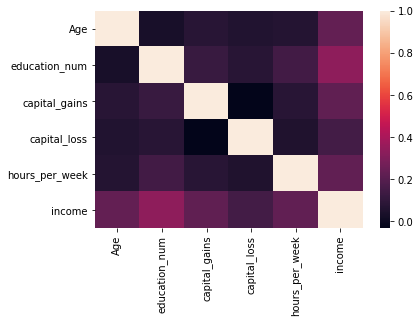

In [110]:
sns.heatmap(adult.corr())

## Data Preparation:

In [111]:
cat_vars = ['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(adult[var], prefix = var)
    data1=adult.join(cat_list)
    adult = data1 

In [112]:
cat_vars = ['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
    
for var in cat_vars:
    cat_list1='var'+'_'+var
    cat_list1=pd.get_dummies(adult_test[var], prefix = var)
    data2=adult_test.join(cat_list1)
    adult_test = data2

In [113]:
cat_vars = ['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
data_vars = adult.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

adult = adult[to_keep]


cat_vars = ['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
data_vars2 = adult_test.columns.values.tolist()
to_keep = [i for i in data_vars2 if i not in cat_vars]

adult_test = adult_test[to_keep]

In [114]:
adult.shape

(32561, 107)

In [115]:
adult_train_labels = adult['income']

adult_train_full = adult.copy()

adult_train = adult.drop(['income'], axis = 1)

adult_test_labels = adult_test["income"]

adult_test_full = adult_test.copy()

adult_test = adult_test.drop(['income'], axis = 1)

In [116]:
adult_test_labels.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(adult_train_full)
adult_train = scaler.transform(adult_train_full)
adult_test = scaler.transform(adult_test_full)

In [118]:
adult_test_full.shape

(16281, 107)

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 20)
adult_train_pca = pca.fit(adult_train).transform(adult_train)
#adult_test_pca = pca.fit(adult_test).transform(adult_test)
adult_test_pca = pca.transform(adult_test)

adult_train_pca

array([[-0.58852419, -2.17598951, -0.8318828 , ...,  0.13492942,
         0.51978985,  0.16805593],
       [ 2.62423696, -0.90423191, -0.29291555, ...,  0.10181701,
         1.06817467,  0.75366234],
       [-0.90481451,  0.97869406, -1.23103798, ..., -0.23914135,
        -0.15398147, -1.36106663],
       ...,
       [-2.31654571, -0.90011674,  0.12998898, ..., -1.21910193,
         0.14189085, -0.78932518],
       [-2.03662551,  1.12786005, -1.72547343, ..., -0.65249397,
        -0.38812246, -0.13769793],
       [ 1.36631218, -1.9861864 ,  0.44360326, ...,  0.59683311,
        -1.40070892, -0.26704182]])

In [120]:
#adult_train_full['income'].value_counts()
adult_test_full['income'].value_counts()

0    12435
1     3846
Name: income, dtype: int64

# kNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(adult_train_pca, adult_train_labels)

neigh_pred = cross_val_predict(neigh, adult_train_pca, adult_train_labels, cv = 10)

In [125]:
neigh_accuracy = accuracy_score(neigh_pred, adult_train_labels)
neigh_precision = precision_score(adult_train_labels, neigh_pred)
neigh_recall = recall_score(adult_train_labels, neigh_pred)
neigh_f1 = f1_score(adult_train_labels, neigh_pred)

print(neigh_accuracy, neigh_precision, neigh_recall, neigh_f1)

0.9422929271214029 0.9143730886850153 0.8389236066828211 0.8750249418024609


In [126]:
y_pred = neigh.predict(adult_test_pca)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [127]:
neigh.score(adult_test_pca, adult_test_labels)

0.9455807382838892

In [128]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(adult_test_labels, y_pred)
matrix

array([[12132,   303],
       [  583,  3263]])

In [129]:
from sklearn.metrics import precision_score, recall_score


0.8484139365574623

In [130]:
print(classification_report(adult_test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     12435
           1       0.92      0.85      0.88      3846

    accuracy                           0.95     16281
   macro avg       0.93      0.91      0.92     16281
weighted avg       0.94      0.95      0.94     16281



# Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
NB = GaussianNB()


NB.fit(adult_train_pca, adult_train_labels)
NB_pred = cross_val_predict(NB, adult_train_pca, adult_train_labels, cv = 10)

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

NB_accuracy = accuracy_score(NB_pred, adult_train_labels)
NB_precision = precision_score(adult_train_labels, NB_pred)
NB_recall = recall_score(adult_train_labels, NB_pred)
NB_f1 = f1_score(adult_train_labels, NB_pred)

print(NB_accuracy, NB_precision, NB_recall, NB_f1)



0.8631491661803998 0.6945625934015404 0.7705649789567657 0.7305925030229746


In [133]:
y_pred1 = NB.predict(adult_test_pca)

matrix1 = confusion_matrix(adult_test_labels, y_pred1)
matrix1

array([[11116,  1319],
       [  842,  3004]])

In [134]:
NB.score(adult_test_pca, adult_test_labels)

0.8672685952951293

In [135]:
print(classification_report(adult_test_labels, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     12435
           1       0.69      0.78      0.74      3846

    accuracy                           0.87     16281
   macro avg       0.81      0.84      0.82     16281
weighted avg       0.87      0.87      0.87     16281



# SVM

In [136]:
from sklearn import svm
svm = svm.SVC()
svm.fit(adult_train_pca, adult_train_labels)
svm_pred = cross_val_predict(svm, adult_train_pca, adult_train_labels, cv = 10)

In [137]:
svm_accuracy = accuracy_score(svm_pred, adult_train_labels)
svm_precision = precision_score(adult_train_labels, svm_pred)
svm_recall = recall_score(adult_train_labels, svm_pred)
svm_f1 = f1_score(adult_train_labels, svm_pred)

print(svm_accuracy, svm_precision, svm_recall, svm_f1)

0.9727281103160222 0.9707515233581584 0.9142966458359904 0.9416787074740576


In [138]:
y_pred2 = svm.predict(adult_test_pca)

In [139]:
matrix2 = confusion_matrix(adult_test_labels, y_pred2)
matrix2

array([[12370,    65],
       [  320,  3526]])

In [204]:
svm.score(adult_test_pca, adult_test_labels)

0.9763528038818254

In [140]:
print(classification_report(adult_test_labels, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12435
           1       0.98      0.92      0.95      3846

    accuracy                           0.98     16281
   macro avg       0.98      0.96      0.97     16281
weighted avg       0.98      0.98      0.98     16281



# Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 1)
tree.fit(adult_train_pca, adult_train_labels)
tree_pred = cross_val_predict(tree, adult_train_pca, adult_train_labels, cv= 10)

In [142]:
tree_accuracy = accuracy_score(tree_pred, adult_train_labels)
tree_precision = precision_score(adult_train_labels, tree_pred)
tree_recall = recall_score(adult_train_labels, tree_pred)
tree_f1 = f1_score(adult_train_labels, tree_pred)

print(tree_accuracy, tree_precision, tree_recall, tree_f1)

0.8693836184392372 0.7631270167204459 0.6635633210049738 0.7098710689678696


In [143]:
y_pred3 = tree.predict(adult_test_pca)

In [144]:
matrix3 = confusion_matrix(adult_test_labels, y_pred3)
matrix3

array([[11567,   868],
       [ 1281,  2565]])

In [203]:
tree.score(adult_test_pca, adult_test_labels)

0.868005650758553

In [145]:
print(classification_report(adult_test_labels, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     12435
           1       0.75      0.67      0.70      3846

    accuracy                           0.87     16281
   macro avg       0.82      0.80      0.81     16281
weighted avg       0.86      0.87      0.87     16281



## Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

forest_pred = cross_val_predict(forest, adult_train_pca, adult_train_labels, cv= 10)

forest.fit(adult_train_pca, adult_train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
forest_accuracy = accuracy_score(forest_pred, adult_train_labels)
forest_precision = precision_score(adult_train_labels, forest_pred)
forest_recall = recall_score(adult_train_labels, forest_pred)
forest_f1 = f1_score(adult_train_labels, forest_pred)

print(forest_accuracy, forest_precision, forest_recall, forest_f1)

0.966493658057185 0.9673220714483522 0.8909577859966841 0.9275708690167962


In [148]:
y_pred4 = forest.predict(adult_test_pca)

In [149]:
matrix4 = confusion_matrix(adult_test_labels, y_pred4)
matrix4

array([[12323,   112],
       [  411,  3435]])

In [202]:
forest.score(adult_test_pca, adult_test_labels)

0.9678766660524538

In [150]:
print(classification_report(adult_test_labels, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     12435
           1       0.97      0.89      0.93      3846

    accuracy                           0.97     16281
   macro avg       0.97      0.94      0.95     16281
weighted avg       0.97      0.97      0.97     16281



## Ada Boost

In [151]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada = ada.fit(adult_train_pca, adult_train_labels)
ada_pred = cross_val_predict(ada, adult_train_pca, adult_train_labels, cv=10)

In [152]:
ada_accuracy = accuracy_score(ada_pred, adult_train_labels)
ada_precision = precision_score(adult_train_labels, ada_pred)
ada_recall = recall_score(adult_train_labels, ada_pred)
ada_f1 = f1_score(adult_train_labels, ada_pred)

print(ada_accuracy, ada_precision, ada_recall, ada_f1)

0.9164951936365591 0.8452413049339444 0.7996429026909833 0.8218100792974639


In [153]:
y_pred5 = ada.predict(adult_test_pca)

In [154]:
matrix5 = confusion_matrix(adult_test_labels, y_pred5)
matrix5

array([[11867,   568],
       [  779,  3067]])

In [201]:
ada.score(adult_test_pca, adult_test_labels)

0.9172655242306984

In [155]:
print(classification_report(adult_test_labels, y_pred5))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12435
           1       0.84      0.80      0.82      3846

    accuracy                           0.92     16281
   macro avg       0.89      0.88      0.88     16281
weighted avg       0.92      0.92      0.92     16281



## Gradient Boosting

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()

grad.fit(adult_train_pca, adult_train_labels)
grad_pred = cross_val_predict(grad, adult_train_pca, adult_train_labels, cv=10)

In [157]:
grad_accuracy = accuracy_score(grad_pred, adult_train_labels)
grad_precision = precision_score(adult_train_labels, grad_pred)
grad_recall = recall_score(adult_train_labels, grad_pred)
grad_f1 = f1_score(adult_train_labels, grad_pred)

print(grad_accuracy, grad_precision, grad_recall, grad_f1)

0.9491108995423974 0.926365140650855 0.8567784721336564 0.8902140064930761


In [158]:
y_pred6 = grad.predict(adult_test_pca)

In [159]:
matrix6 = confusion_matrix(adult_test_labels, y_pred6)
matrix6

array([[12161,   274],
       [  562,  3284]])

In [200]:
grad.score(adult_test_pca, adult_test_labels)

0.948651802714821

In [160]:
print(classification_report(adult_test_labels, y_pred6))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12435
           1       0.92      0.85      0.89      3846

    accuracy                           0.95     16281
   macro avg       0.94      0.92      0.93     16281
weighted avg       0.95      0.95      0.95     16281



## Linear Discriminant

In [161]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LD = LinearDiscriminantAnalysis()

LD.fit(adult_train_pca, adult_train_labels)
LD_pred = cross_val_predict(LD, adult_train_pca, adult_train_labels, cv = 10)

In [162]:
LD_accuracy = accuracy_score(LD_pred, adult_train_labels)
LD_precision = precision_score(adult_train_labels, LD_pred)
LD_recall = recall_score(adult_train_labels, LD_pred)
LD_f1 = f1_score(adult_train_labels, LD_pred)

print(LD_accuracy, LD_precision, LD_recall, LD_f1)

0.8920487700009213 0.7994186046511628 0.7365131998469583 0.7666777298373713


In [163]:
y_pred7 = LD.predict(adult_test_pca)

In [164]:
matrix7 = confusion_matrix(adult_test_labels, y_pred7)
matrix7

array([[11720,   715],
       [ 1050,  2796]])

In [199]:
LD.score(adult_test_pca, adult_test_labels)

0.8915914255881089

In [165]:
print(classification_report(adult_test_labels, y_pred7))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     12435
           1       0.80      0.73      0.76      3846

    accuracy                           0.89     16281
   macro avg       0.86      0.83      0.85     16281
weighted avg       0.89      0.89      0.89     16281



## MLP Classifier

In [166]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()

MLP.fit(adult_train_pca, adult_train_labels)
MLP_pred = cross_val_predict(MLP, adult_train_pca, adult_train_labels, cv = 10)

In [167]:
MLP_accuracy = accuracy_score(MLP_pred, adult_train_labels)
MLP_precision = precision_score(adult_train_labels, MLP_pred)
MLP_recall = recall_score(adult_train_labels, MLP_pred)
MLP_f1 = f1_score(adult_train_labels, MLP_pred)

print(MLP_accuracy, MLP_precision, MLP_recall, MLP_f1)

0.9916157366174257 0.986375321336761 0.9787016962122178 0.9825235260226618


In [168]:
y_pred8 = MLP.predict(adult_test_pca)

In [169]:
matrix8 = confusion_matrix(adult_test_labels, y_pred8)
matrix8

array([[12396,    39],
       [   72,  3774]])

In [198]:
MLP.score(adult_test_pca, adult_test_labels)

0.9931822369633315

In [170]:
print(classification_report(adult_test_labels, y_pred8))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12435
           1       0.99      0.98      0.99      3846

    accuracy                           0.99     16281
   macro avg       0.99      0.99      0.99     16281
weighted avg       0.99      0.99      0.99     16281



## Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(adult_train_pca, adult_train_labels)
log_pred = cross_val_predict(log, adult_train_pca, adult_train_labels, cv = 10)

In [194]:
log_accuracy = accuracy_score(log_pred, adult_train_labels)
log_precision = precision_score(adult_train_labels, log_pred)
log_recall = recall_score(adult_train_labels, log_pred)
log_f1 = f1_score(adult_train_labels, log_pred)

print(log_accuracy, log_precision, log_recall, log_f1)

0.9042105586437763 0.822805578342904 0.7675041448794797 0.7941933355328276


In [173]:
y_pred9 = log.predict(adult_test_pca)

In [197]:
log.score(adult_test_pca, adult_test_labels)

0.9044898961980222

In [206]:
from sklearn import metrics



ValueError: continuous-multioutput format is not supported

In [174]:
matrix9 = confusion_matrix(adult_test_labels, y_pred9)
matrix9

array([[11794,   641],
       [  914,  2932]])

In [175]:
print(classification_report(adult_test_labels, y_pred9))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12435
           1       0.82      0.76      0.79      3846

    accuracy                           0.90     16281
   macro avg       0.87      0.86      0.86     16281
weighted avg       0.90      0.90      0.90     16281



In [205]:
#

table = {'Name':  ['kNN', 'naive Bayes', 'SVM', 'decision tree', 'random forest',  'AdaBoost', 'gradient Boosting', 'linear discriminant analysis', 'multi-layer perceptron', 'logistic regression'],
         'Accuracy': [0.94,0.86,0.98,0.87,0.97,0.92,0.95,0.89,0.99,0.90],
         'Precision': [0.93,0.81,0.98,0.82,0.97,0.89,0.94,0.86,0.99,0.87],
         'Recall': [0.91,0.84,0.96,0.80,0.94,0.88,0.92,0.83,0.99,0.96],
         'F1':[0.92,0.82,0.97,0.81,0.95,0.89,0.93,0.85,0.99,0.86]}
         
         

        
table = pd.DataFrame (table, columns = ['Name','Accuracy','Precision', 'Recall', 'F1'])



table



,Name,Accuracy,Precision,Recall,F1
0,kNN,0.94,0.93,0.91,0.92
1,naive Bayes,0.86,0.81,0.84,0.82
2,SVM,0.98,0.98,0.96,0.97
3,decision tree,0.87,0.82,0.80,0.81
4,random forest,0.97,0.97,0.94,0.95
5,AdaBoost,0.92,0.89,0.88,0.89
6,gradient Boosting,0.95,0.94,0.92,0.93
7,linear discriminant analysis,0.89,0.86,0.83,0.85
8,multi-layer perceptron,0.99,0.99,0.99,0.99
9,logistic regression,0.90,0.87,0.96,0.86


## Part 3

Loss functions

In [35]:
"""
A function used to compute for the loss

"""  

import numpy as np


def compute_loss(y, x, theta, metric_type):
    """
    Compute the loss of given data with respect to the ground truth
      y            ground truth
      x            input data (feature matrix)
      theta        model parameters (w and b)
      metric_type  metric type seletor, e.g., "MSE" indicates the Mean Squared Error.
    """
    if metric_type.upper() == "MSE":
        return np.mean(np.power(x.dot(theta) - y, 2))
    elif metric_type.upper() == "RMSE":
        return np.sqrt(np.mean(np.power(x.dot(theta) - y, 2)))
    elif metric_type.upper() == "R2":
        return - (1 - np.mean(np.power(x.dot(theta) - y, 2)) / np.mean(np.power(y - np.mean(y), 2)))
    elif metric_type.upper() == "MAE":
        return np.mean(np.abs(y - x.dot(theta)))

Optimizers

In [61]:
from utilities.losses import compute_loss


def gradient_descent(y, x, theta, max_iters, alpha, metric_type):
    """
    Batch Gradient Descent
    :param y:               ground truth
    :param x:               input data (feature matrix)
    :param theta:           model parameters (w and b)
    :param max_iters:       max iterations
    :param alpha:           step size
    :param metric_type:     metric type
    :return: thetas         all tracked updated model parameters
             losses         all tracked losses during the learning course
    """
    losses = []
    thetas = []
    num_of_samples = len(x)
    for i in range(max_iters):
        # This is for MSE loss only
        gradient = -2 * x.T.dot(y - x.dot(theta)) / num_of_samples
        theta = theta - alpha * gradient
        loss = compute_loss(y, x, theta, metric_type)

        # Track losses and thetas
        thetas.append(theta)
        losses.append(loss)

        print("BGD({bi}/{ti}): loss={l}, w={w}, b={b}".format(
            bi = i, ti = max_iters - 1, l = loss, w = theta[0], b = theta[1]))
    return thetas, losses


def mini_batch_gradient_descent(y, x, theta, max_iters, alpha, metric_type, mini_batch_size):
    """
    Mini Batch Gradient Descent
    :param y:               ground truth
    :param x:               input data (feature matrix)
    :param theta:           model parameters (w and b)
    :param max_iters:       max iterations
    :param alpha:           step size
    :param metric_type:     metric type
    :param mini_batch_size: mini batch size
    :return: thetas         all tracked updated model parameters
             losses         all tracked losses during the learning course
    """
    losses = []
    thetas = []
    # Please refer to the function "gradient_descent" to implement the mini-batch gradient descent here
    num_of_samples = len(x)
    for i in range(max_iters):
        # This is for MSE loss only
        gradient = -2 * x.T.dot(y - x.dot(theta)) / num_of_samples
        theta = theta - alpha * gradient
        loss = compute_loss(y, x, theta, metric_type)

        # Track losses and thetas
        thetas.append(theta)
        losses.append(loss)

        print("BGD({bi}/{ti}): loss={l}, w={w}, b={b}".format(
            bi = i, ti = max_iters - 1, l = loss, w = theta[0], b = theta[1]))
    return thetas, losses


def pso(y, x, theta, max_iters, pop_size, metric_type):
    """
    Particle Swarm Optimization
    :param y:               train labels
    :param x:               train data
    :param theta:           model parameters
    :param max_iters:       max iterations
    :param pop_size:        population size
    :param metric_type:     metric type (MSE, RMSE, R2, MAE)
    :return: best_thetas    all tracked best model parameters for each generation
             losses         all tracked losses of the best model in each generation
    """
    # Init settings
    w = 0.729844  # Inertia weight to prevent velocities becoming too large
    c_p = 1.496180  # Scaling co-efficient on the social component
    c_g = 1.496180  # Scaling co-efficient on the cognitive component

    terminate = False
    g_best = theta

    lower_bound = -100
    upper_bound = 100

    velocity = []
    thetas = []
    p_best = []

    # Track results
    best_thetas = []
    losses = []

    # initialization
    for i in range(pop_size):
        theta = np.random.uniform(lower_bound, upper_bound, len(theta))
        thetas.append(theta)
        p_best.append(theta)
        if compute_loss(y, x, theta, metric_type) < compute_loss(y, x, g_best, metric_type):
            g_best = theta.copy()
        velocity.append(
            np.random.uniform(-np.abs(upper_bound - lower_bound), np.abs(upper_bound - lower_bound), len(theta)))

    # Evolution
    count = 0
    while not terminate:
        for i in range(pop_size):
            rand_p = np.random.uniform(0, 1, size = len(theta))
            rand_g = np.random.uniform(0, 1, size = len(theta))
            velocity[i] = w * velocity[i] + c_p * rand_p * (p_best[i] - thetas[i]) + c_g * rand_g * (g_best - thetas[i])
            thetas[i] = thetas[i] + velocity[i]
            if compute_loss(y, x, thetas[i], metric_type) < compute_loss(y, x, p_best[i], metric_type):
                p_best[i] = thetas[i]
                if compute_loss(y, x, p_best[i], metric_type) < compute_loss(y, x, g_best, metric_type):
                    g_best = p_best[i]
        best_thetas.append(g_best)
        current_loss = compute_loss(y, x, g_best, metric_type)
        losses.append(current_loss)

        print("PSO({bi}/{ti}): loss={l}, w={w}, b={b}".format(
            bi = count, ti = max_iters - 1, l = current_loss, w = g_best[0], b = g_best[1]))
        count += 1
        if count >= max_iters:
            terminate = True
    return best_thetas, losses



In [3]:
"""
This is an example to perform simple linear regression algorithm on the dataset (weight and height),
where x = weight and y = height.
"""
import datetime
import random

from utilities.losses import compute_loss
from utilities.optimizers import gradient_descent, pso, mini_batch_gradient_descent
from sklearn.model_selection import train_test_split

# General settings
from utilities.visualization import visualize_train, visualize_test

seed = 309
# Freeze the random seed
random.seed(seed)
np.random.seed(seed)
train_test_split_test_size = 0.3

# Training settings
alpha = 0.1  # step size
max_iters = 50  # max iterations


def load_data():
    """
    Load Data from CSV
    :return: df    a panda data frame
    """
    df = pd.read_csv("/Users/keirynhart/Documents/Uni/Comp 309/Assignment 4/Part2.csv")
    return df


def data_preprocess(data):
    """
    Data preprocess:
        1. Split the entire dataset into train and test
        2. Split outputs and inputs
        3. Standardize train and test
        4. Add intercept dummy for computation convenience
    :param data: the given dataset (format: panda DataFrame)
    :return: train_data       train data contains only inputs
             train_labels     train data contains only labels
             test_data        test data contains only inputs
             test_labels      test data contains only labels
             train_data_full       train data (full) contains both inputs and labels
             test_data_full       test data (full) contains both inputs and labels
    """
    # Split the data into train and test
    train_data, test_data = train_test_split(data, test_size = train_test_split_test_size)

    # Pre-process data (both train and test)
    train_data_full = train_data.copy()
    train_data = train_data.drop(["Height"], axis = 1)
    train_labels = train_data_full["Height"]

    test_data_full = test_data.copy()
    test_data = test_data.drop(["Height"], axis = 1)
    test_labels = test_data_full["Height"]

    # Standardize the inputs
    train_mean = train_data.mean()
    train_std = train_data.std()
    train_data = (train_data - train_mean) / train_std
    test_data = (test_data - train_mean) / train_std

    # Tricks: add dummy intercept to both train and test
    train_data['intercept_dummy'] = pd.Series(1.0, index = train_data.index)
    test_data['intercept_dummy'] = pd.Series(1.0, index = test_data.index)
    return train_data, train_labels, test_data, test_labels, train_data_full, test_data_full


def learn(y, x, theta, max_iters, alpha, optimizer_type = "BGD", metric_type = "MSE"):
    """
    Learn to estimate the regression parameters (i.e., w and b)
    :param y:                   train labels
    :param x:                   train data
    :param theta:               model parameter
    :param max_iters:           max training iterations
    :param alpha:               step size
    :param optimizer_type:      optimizer type (default: Batch Gradient Descient): GD, SGD, MiniBGD or PSO
    :param metric_type:         metric type (MSE, RMSE, R2, MAE). NOTE: MAE can't be optimized by GD methods.
    :return: thetas              all updated model parameters tracked during the learning course
             losses             all losses tracked during the learning course
    """
    thetas = None
    losses = None
    if optimizer_type == "BGD":
        thetas, losses = gradient_descent(y, x, theta, max_iters, alpha, metric_type)
    elif optimizer_type == "MiniBGD":
        thetas, losses = mini_batch_gradient_descent(y, x, theta, max_iters, alpha, metric_type, mini_batch_size = 10)
    elif optimizer_type == "PSO":
        thetas, losses = pso(y, x, theta, max_iters, 100, metric_type)
    else:
        raise ValueError(
            "[ERROR] The optimizer '{ot}' is not defined, please double check and re-run your program.".format(
                ot = optimizer_type))
    
    start_time = datetime.datetime.now()  # Track learning starting time
    thetas, losses = learn(train_labels.values, train_data.values, theta, max_iters, alpha, optimizer_type, metric_type)

    end_time = datetime.datetime.now()  # Track learning ending time
    exection_time = (end_time - start_time).total_seconds()  # Track execution time

    # Step 4: Results presentation
    print("Learn: execution time={t:.3f} seconds".format(t = exection_time))

    # Build baseline model
    print("R2:", -compute_loss(test_labels.values, test_data.values, thetas[-1], "R2"))  # R2 should be maximize
    print("MSE:", compute_loss(test_labels.values, test_data.values, thetas[-1], "MSE"))
    print("RMSE:", compute_loss(test_labels.values, test_data.values, thetas[-1], "RMSE"))
    print("MAE:", compute_loss(test_labels.values, test_data.values, thetas[-1], "MAE"))
    
    return thetas, losses


if __name__ == '__main__':
    # Settings
    metric_type = "MSE"  # MSE, RMSE, MAE, R2
    optimizer_type = "BGD"  # PSO, BGD

    # Step 1: Load Data
    data = load_data()

    # Step 2: Preprocess the data
    train_data, train_labels, test_data, test_labels, train_data_full, test_data_full = data_preprocess(data)

    # Step 3: Learning Start
    theta = np.array([0.0, 0.0])  # Initialize model parameter

    start_time = datetime.datetime.now()  # Track learning starting time
    thetas, losses = learn(train_labels.values, train_data.values, theta, max_iters, alpha, optimizer_type, metric_type)

    end_time = datetime.datetime.now()  # Track learning ending time
    exection_time = (end_time - start_time).total_seconds()  # Track execution time

    # Step 4: Results presentation
    print("Learn: execution time={t:.3f} seconds".format(t = exection_time))

    # Build baseline model
    print("R2:", -compute_loss(test_labels.values, test_data.values, thetas[-1], "R2"))  # R2 should be maximize
    print("MSE:", compute_loss(test_labels.values, test_data.values, thetas[-1], "MSE"))
    print("RMSE:", compute_loss(test_labels.values, test_data.values, thetas[-1], "RMSE"))
    print("MAE:", compute_loss(test_labels.values, test_data.values, thetas[-1], "MAE"))



    

BGD(0/49): loss=2852.0391348515573, w=0.7075625032674936, b=13.327898231674286
BGD(1/49): loss=1825.9850450301676, w=1.2740168273119257, b=23.990216817013714
BGD(2/49): loss=1169.3077854571814, w=1.7275039747326382, b=32.52007168528526
BGD(3/49): loss=749.032645978115, w=2.090552828182019, b=39.34395557990249
BGD(4/49): loss=480.05547141724435, w=2.3811993674292085, b=44.80306269559628
BGD(5/49): loss=307.9093841173321, w=2.613882682563672, b=49.17034838815131
BGD(6/49): loss=197.73544243739016, w=2.800162296565605, b=52.66417694219533
BGD(7/49): loss=127.22383403736701, w=2.949292433260866, b=55.459239785430555
BGD(8/49): loss=82.09622153611427, w=3.0686817598380434, b=57.69529006001873
BGD(9/49): loss=53.21443216767158, w=3.164261443572115, b=59.48413027968927
BGD(10/49): loss=34.73001174923219, w=3.2407798075215055, b=60.9152024554257
BGD(11/49): loss=22.899934470144352, w=3.3020382234604178, b=62.060060196014845
BGD(12/49): loss=15.32865411221005, w=3.3510799610206554, b=62.9759463

In [39]:
"""
Visualization functions
"""

import matplotlib.pyplot as plt
import numpy as np

# Visualize the training course
from utilities.losses import compute_loss


def compute_z_loss(y, x, thetas):
    """
    Compute z-axis values
    :param y:            train labels
    :param x:            train data
    :param thetas:       model parameters
    :return: z_losses    value (loss) for z-axis
    """
    thetas = np.array(thetas)
    w = thetas[:, 0].reshape(thetas[:, 0].shape[0], )
    b = thetas[:, 1].reshape(thetas[:, 1].shape[0], )
    z_losses = np.zeros((len(w), len(b)))
    for ind_row, row in enumerate(w):
        for ind_col, col in enumerate(b):
            theta = np.array([row, col])
            z_losses[ind_row, ind_col] = compute_loss(y, x, theta, "MSE")
    return z_losses


def predict(x, thetas):
    """
    Predict function
    :param x:               test data
    :param thetas:          trained model parameters
    :return:                prediced labels
    """
    return x.dot(thetas)


def visualize_train(train_data_full, train_labels, train_data, thetas, losses, niter):
    """
    Visualize Function for Training Results
    :param train_data_full:   the train data set (full) with labels and data
    :param thetas:            model parameters
    :param losses:            all tracked losses
    :param niter:             completed training iterations
    :return: fig1              the figure for line fitting on training data
             fig2              learning curve in terms of error
             fig3              gradient variation visualization
    """
    fig1, ax1 = plt.subplots()
    ax1.scatter(train_data_full["Weight"], train_data_full["Height"], color = 'blue')

    # De-standarize
    train_mean = train_data_full["Weight"].mean()
    train_std = train_data_full["Weight"].std()
    train_data_for_plot = train_mean + train_data["Weight"] * train_std

    ax1.plot(train_data_for_plot, predict(train_data, thetas[niter - 1]), color = 'red', linewidth = 2)
    ax1.set_xlabel("Height")
    ax1.set_ylabel("Weight")

    fig2, ax2 = plt.subplots()
    ax2.plot(range(len(losses)), losses, color = 'blue', linewidth = 2)
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("MSE")

    fig3, ax3 = plt.subplots()
    np_gradient_ws = np.array(thetas)

    w = np.linspace(min(np_gradient_ws[:, 0]), max(np_gradient_ws[:, 0]), len(np_gradient_ws[:, 0]))
    b = np.linspace(min(np_gradient_ws[:, 1]), max(np_gradient_ws[:, 1]), len(np_gradient_ws[:, 1]))
    x, y = np.meshgrid(w, b)
    z = compute_z_loss(train_labels, train_data, np.stack((w,b)).T)
    cp = ax3.contourf(x, y, z, cmap = plt.cm.jet)
    fig3.colorbar(cp, ax = ax3)
    ax3.plot(3.54794951, 66.63949115837143, color = 'red', marker = '*', markersize = 20)
    if niter > 0:
        thetas_to_plot = np_gradient_ws[:niter]
    ax3.plot(thetas_to_plot[:, 0], thetas_to_plot[:, 1], marker = 'o', color = 'w', markersize = 10)
    ax3.set_xlabel(r'$w$')
    ax3.set_ylabel(r'$b$')
    return fig1, fig2, fig3


def visualize_test(test_data_full, test_data, thetas):
    """
    Visualize Test for Testing Results
    :param test_data_full:          the test data set (full) with labels and data
    :param thetas:                  model parameters
    :return: fig
    """
    fig, ax = plt.subplots()
    ax.scatter(test_data_full["Weight"], test_data_full["Height"], color='blue')
    ax.plot(test_data_full["Weight"], predict(test_data, thetas[-1]), color='red', linewidth=2)
    return fig


In [30]:
theta = np.array([0.0,0.0])

In [60]:
df = load_data()

In [62]:
df = data_preprocess(df)

In [87]:
#BGD_MSE = learn(train_labels, train_data, theta, 50, 0.1, "BGD", "MSE")
start_time = datetime.datetime.now()
thetas1, losses1 = gradient_descent(train_labels, train_data, theta, 50, 0.1, "MSE")

end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()
print("Learn: execution time={t:.3f} seconds".format(t = exection_time))

print("R2:", -compute_loss(test_labels, test_data, thetas1[-1], "R2"))  # R2 should be maximize
print("MSE:", compute_loss(test_labels, test_data, thetas1[-1], "MSE"))
print("RMSE:", compute_loss(test_labels, test_data, thetas1[-1], "RMSE"))
print("MAE:", compute_loss(test_labels, test_data, thetas1[-1], "MAE"))


#visualize_train(train_data_full, train_labels, train_data, thetas, losses, 50)

BGD(0/49): loss=2852.039134851559, w=0.7075625032674936, b=13.327898231674286
BGD(1/49): loss=1825.9850450301685, w=1.2740168273119257, b=23.990216817013714
BGD(2/49): loss=1169.3077854571823, w=1.7275039747326382, b=32.52007168528526
BGD(3/49): loss=749.0326459781148, w=2.090552828182019, b=39.34395557990249
BGD(4/49): loss=480.055471417244, w=2.3811993674292085, b=44.80306269559628
BGD(5/49): loss=307.9093841173318, w=2.613882682563672, b=49.17034838815131
BGD(6/49): loss=197.73544243739008, w=2.800162296565605, b=52.66417694219533
BGD(7/49): loss=127.22383403736698, w=2.949292433260866, b=55.459239785430555
BGD(8/49): loss=82.09622153611429, w=3.0686817598380434, b=57.69529006001873
BGD(9/49): loss=53.21443216767159, w=3.164261443572115, b=59.48413027968927
BGD(10/49): loss=34.73001174923218, w=3.2407798075215055, b=60.9152024554257
BGD(11/49): loss=22.89993447014434, w=3.3020382234604178, b=62.060060196014845
BGD(12/49): loss=15.328654112210042, w=3.3510799610206554, b=62.975946388

In [72]:
pred = predict(test_data, thetas[-1])

(<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 2 Axes>)

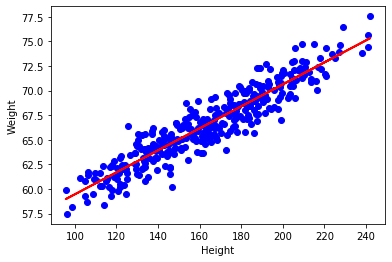

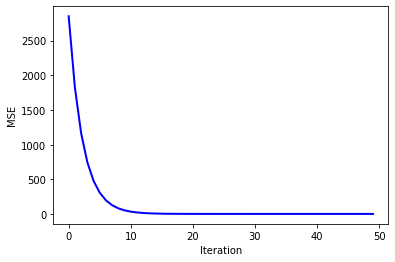

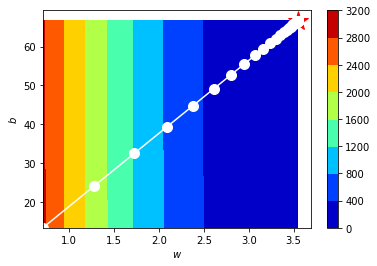

In [65]:
visualize_train(train_data_full, train_labels, train_data, thetas1, losses1, 50)

In [88]:
start_time = datetime.datetime.now()

thetas2, losses2 = mini_batch_gradient_descent(train_labels, train_data, theta, 50, 0.1, "MSE", 10)

end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()
print("Learn: execution time={t:.3f} seconds".format(t = exection_time))

#(train_labels, train_data, theta, 50, 0.1, "MSE")

BGD(0/49): loss=2852.039134851559, w=0.7075625032674936, b=13.327898231674286
BGD(1/49): loss=1825.9850450301685, w=1.2740168273119257, b=23.990216817013714
BGD(2/49): loss=1169.3077854571823, w=1.7275039747326382, b=32.52007168528526
BGD(3/49): loss=749.0326459781148, w=2.090552828182019, b=39.34395557990249
BGD(4/49): loss=480.055471417244, w=2.3811993674292085, b=44.80306269559628
BGD(5/49): loss=307.9093841173318, w=2.613882682563672, b=49.17034838815131
BGD(6/49): loss=197.73544243739008, w=2.800162296565605, b=52.66417694219533
BGD(7/49): loss=127.22383403736698, w=2.949292433260866, b=55.459239785430555
BGD(8/49): loss=82.09622153611429, w=3.0686817598380434, b=57.69529006001873
BGD(9/49): loss=53.21443216767159, w=3.164261443572115, b=59.48413027968927
BGD(10/49): loss=34.73001174923218, w=3.2407798075215055, b=60.9152024554257
BGD(11/49): loss=22.89993447014434, w=3.3020382234604178, b=62.060060196014845
BGD(12/49): loss=15.328654112210042, w=3.3510799610206554, b=62.975946388

In [89]:
start_time = datetime.datetime.now()

thetas2, losses2 = pso(train_labels, train_data, theta, 50, 100, "MSE")

end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()
print("Learn: execution time={t:.3f} seconds".format(t = exection_time))

print("R2:", -compute_loss(test_labels, test_data, thetas2[-1], "R2"))  # R2 should be maximize
print("MSE:", compute_loss(test_labels, test_data, thetas2[-1], "MSE"))
print("RMSE:", compute_loss(test_labels, test_data, thetas2[-1], "RMSE"))
print("MAE:", compute_loss(test_labels, test_data, thetas2[-1], "MAE"))




PSO(0/49): loss=213.74545944441604, w=16.35487976774624, b=73.59133777059216
PSO(1/49): loss=129.03548750457776, w=-5.087770641078393, b=73.90615829448103
PSO(2/49): loss=23.90990843953335, w=-0.06899765784126544, b=63.640069103661446
PSO(3/49): loss=14.777221581369735, w=3.081228634145317, b=70.20201394728642
PSO(4/49): loss=14.777221581369735, w=3.081228634145317, b=70.20201394728642
PSO(5/49): loss=14.777221581369735, w=3.081228634145317, b=70.20201394728642
PSO(6/49): loss=2.7607937797725177, w=3.0116601457543046, b=65.86131233672671
PSO(7/49): loss=2.7607937797725177, w=3.0116601457543046, b=65.86131233672671
PSO(8/49): loss=2.7607937797725177, w=3.0116601457543046, b=65.86131233672671
PSO(9/49): loss=2.7607937797725177, w=3.0116601457543046, b=65.86131233672671
PSO(10/49): loss=2.7607937797725177, w=3.0116601457543046, b=65.86131233672671
PSO(11/49): loss=2.7607937797725177, w=3.0116601457543046, b=65.86131233672671
PSO(12/49): loss=1.9668976238482514, w=3.819692387963258, b=66.4

In [73]:
pred2 = predict(test_data, thetas2[-1])

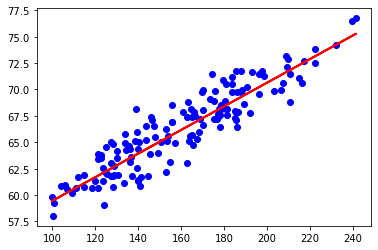

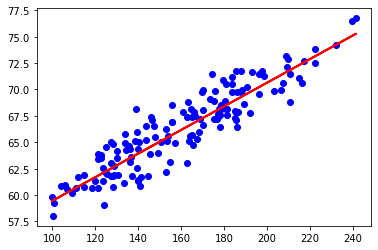

In [84]:
#visualize_train(train_data_full, train_labels, train_data, thetas2, losses2, 50)
visualize_test(test_data_full, test_data, thetas2)

In [90]:
start_time = datetime.datetime.now()

thetas3, losses3 = pso(train_labels, train_data, theta, 50, 100, "MAE")

end_time = datetime.datetime.now()
exection_time = (end_time - start_time).total_seconds()
print("Learn: execution time={t:.3f} seconds".format(t = exection_time))

print("R2:", -compute_loss(test_labels, test_data, thetas3[-1], "R2"))  # R2 should be maximize
print("MSE:", compute_loss(test_labels, test_data, thetas3[-1], "MSE"))
print("RMSE:", compute_loss(test_labels, test_data, thetas3[-1], "RMSE"))
print("MAE:", compute_loss(test_labels, test_data, thetas3[-1], "MAE"))

PSO(0/49): loss=4.583129893963078, w=8.22998091064153, b=69.27010505658089
PSO(1/49): loss=4.583129893963078, w=8.22998091064153, b=69.27010505658089
PSO(2/49): loss=4.583129893963078, w=8.22998091064153, b=69.27010505658089
PSO(3/49): loss=4.583129893963078, w=8.22998091064153, b=69.27010505658089
PSO(4/49): loss=4.583129893963078, w=8.22998091064153, b=69.27010505658089
PSO(5/49): loss=4.569693827866598, w=0.7003913448427195, b=62.254844362338204
PSO(6/49): loss=4.161288989991838, w=5.4395832002476965, b=62.52607037304665
PSO(7/49): loss=3.236630069657532, w=3.895718297821876, b=63.418299708011276
PSO(8/49): loss=1.8656334833432828, w=2.0218233469853075, b=65.52034050228576
PSO(9/49): loss=1.8656334833432828, w=2.0218233469853075, b=65.52034050228576
PSO(10/49): loss=1.3738738853763859, w=4.449152390226121, b=67.08127377854223
PSO(11/49): loss=1.3738738853763859, w=4.449152390226121, b=67.08127377854223
PSO(12/49): loss=1.0859271601510694, w=3.4872155753521303, b=66.70979545992932
PS

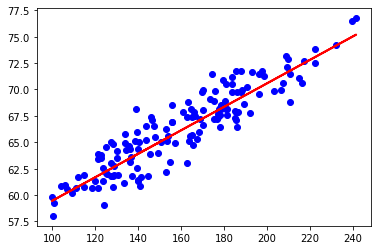

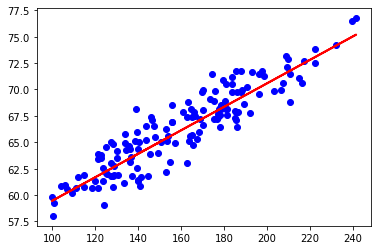

In [85]:
visualize_test(test_data_full, test_data, thetas3)

In [215]:

table = {'Name': ['BGD', 'Mini batch', 'PSO+MSE', 'PSO+MAE'],
        'R2':[0.84, 0,0.84,0.83],
        'MSE':[2.42,0 , 2.41, 2.43],
        'RMSE':[1.55, 0, 1.55, 1.56],
        'MAE':[1.28,0 , 1.28,1.28]}
table = pd.DataFrame (table, columns = ['Name', 'R2', 'MSE', 'RMSE', 'MAE'])

table

,Name,R2,MSE,RMSE,MAE
0,BGD,0.84,2.42,1.55,1.28
1,Mini batch,0.00,0.00,0.00,0.00
2,PSO+MSE,0.84,2.41,1.55,1.28
3,PSO+MAE,0.83,2.43,1.56,1.28


In [212]:
table = {'Name':  ['kNN', 'naive Bayes', 'SVM', 'decision tree', 'random forest',  'AdaBoost', 'gradient Boosting', 'linear discriminant analysis', 'multi-layer perceptron', 'logistic regression'],
         'Accuracy': [0.94,0.86,0.98,0.87,0.97,0.92,0.95,0.89,0.99,0.90],
         'Precision': [0.93,0.81,0.98,0.82,0.97,0.89,0.94,0.86,0.99,0.87],
         'Recall': [0.91,0.84,0.96,0.80,0.94,0.88,0.92,0.83,0.99,0.96],
         'F1':[0.92,0.82,0.97,0.81,0.95,0.89,0.93,0.85,0.99,0.86]}
         
         

        
table = pd.DataFrame (table, columns = ['Name','Accuracy','Precision', 'Recall', 'F1'])

table

,Name,Accuracy,Precision,Recall,F1
0,kNN,0.94,0.93,0.91,0.92
1,naive Bayes,0.86,0.81,0.84,0.82
2,SVM,0.98,0.98,0.96,0.97
3,decision tree,0.87,0.82,0.80,0.81
4,random forest,0.97,0.97,0.94,0.95
5,AdaBoost,0.92,0.89,0.88,0.89
6,gradient Boosting,0.95,0.94,0.92,0.93
7,linear discriminant analysis,0.89,0.86,0.83,0.85
8,multi-layer perceptron,0.99,0.99,0.99,0.99
9,logistic regression,0.90,0.87,0.96,0.86
